In [13]:
import numpy as np
import pandas as pd
from tkinter import filedialog
import os
import pylab as pl
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"  # Estupido windows
#ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"
print(f"\nArchivo: \n {ruta}")


Archivo: 
 C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv


In [15]:
datos = pd.read_csv(ruta, header=None).values
datos.astype(float)
print(type(datos))
len(datos)

<class 'numpy.ndarray'>


62

In [16]:
m = datos.size
media = np.mean(datos)

In [17]:
matriz01 = np.zeros ((m, 5))
matriz02 = np.zeros ((m, 3))
matriz02 [:] = -999
matriz02 [0, 0] = 2
matriz02 [1, 0] = 5
matriz02 [2, 0] = 10
matriz02 [3, 0] = 20
matriz02 [4, 0] = 50
matriz02 [5, 0] = 100
matriz02 [6, 0] = 200
matriz02 [7, 0] = 500
matriz02 [8, 0] = 1000
matriz02 [9, 0] = 2000
matriz02 [10, 0] = 5000
matriz02 [11, 0] = 10000
EEstandart = np.full((m, 1), -999, float)

In [18]:
for i in range (m):
    matriz01 [i, 0] = i + 1                  # Se crea la columna para el No de Orden
    matriz01 [i, 1] = datos.max()         # Se crea la columna que contiene los gastos
    j = datos.argmax()                    # registrados ordenado en forma descendente
    datos [j, 0] = -1
    matriz01 [i, 2] = (m + 1)/matriz01[i,0]  # Se crea la columna con los periodos de retorno
                                                    # (Tr) a partir de la columna de los gastos registrados ordenados
    matriz01 [i, 3] = 1-(1/matriz01[i, 2])   # Se crea la columna para los valores de F(x) a partir de Tr
            

In [19]:
beta = 1 / media

In [20]:
EE = 0
for i in range (m):                          # Datos ajustados
    matriz01 [i, 4] = (1 / beta) * np.abs(np.log(1 - matriz01[i, 3]))
    prueba = (matriz01 [i, 1] - matriz01 [i, 4]) ** 2
    EE = EE + prueba

ErrorE = (EE/(m-1)) ** 0.5                   # Se estima el Error Estandart para 1 parametro
print ("Distribucion Exponencial 1 parámetro, Error Estandart (Momentos y Máxima verosimilitud):", ErrorE)
EEstandart[0, 0] = ErrorE

Distribucion Exponencial 1 parámetro, Error Estandart (Momentos y Máxima verosimilitud): 1066.304402260619


In [21]:
n=12
for i in range (n):
    matriz02 [i, 1] = 1.0 - (1.0/matriz02 [i, 0])  # se crea la columna de F(x)
                                                            # Valores Extrapolados
    matriz02 [i, 2] = (1 / beta) * np.abs(np.log(1 - matriz02[i, 1]))

In [22]:
columnas = ['No Orden', 'Valor Registrado','Tr (Anios)', 'F(x)', 'Valor Ajustado']
cD = pd.DataFrame(matriz01, columns = columnas)
cD.insert(5, 'Tr', matriz02 [:, 0])
cD.insert(6, 'F(X)', matriz02 [:, 1])
cD.insert(7, 'Valor Extrapolado', matriz02 [:, 2])
cD.insert(8, 'Error Estandart "Momentos y Máxima verosimilitud"', EEstandart [:, 0])

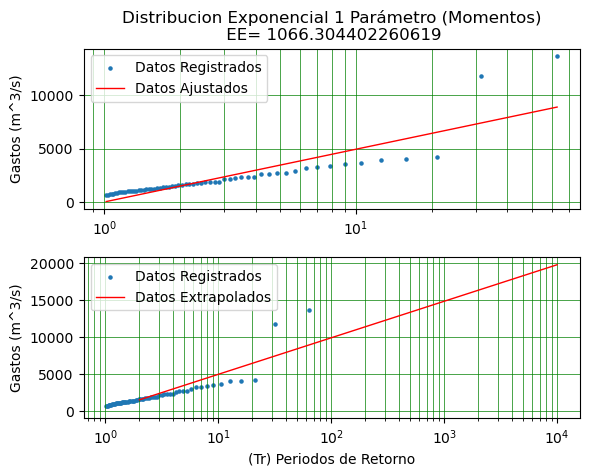

In [23]:
titulo = "Distribucion Exponencial 1 Parámetro (Momentos)\n EE= " + str(ErrorE)

tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
dAjust = matriz01 [:, 4]
dExtrap = matriz02 [:12, 2]
dTrExtrap = matriz02 [:12, 0]
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.', s=20) # s establece el tamaño de punto
pl.plot(tR, dAjust, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="upper left")
pl.title(titulo)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.', s=20)
pl.plot(dTrExtrap, dExtrap, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="upper left")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/DistribucionExponencial1P.png", dpi=1200)
pl.show()

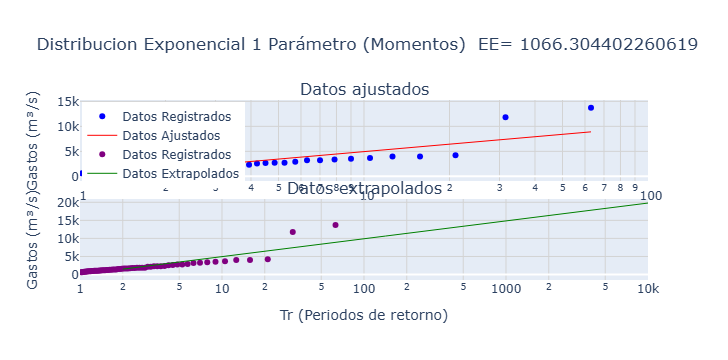

In [24]:
# Crear subplots
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.1, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))

# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust, 
                         mode='lines', 
                         name='Datos Ajustados', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, mode='markers', 
                         name='Datos Registrados', 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap, mode='lines', 
                         name='Datos Extrapolados', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo,
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)
)
'''
# Añadir una leyenda personalizada como anotación para el gráfico 1
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.05, y=0.99, showarrow=False,
    text="Gráfico 1: Datos Registrados y Ajustados",
    font=dict(size=12, color="black")
)

# Añadir una leyenda personalizada como anotación para el gráfico 2
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.05, y=0.40, showarrow=False,
    text="Gráfico 2: Datos Registrados y Extrapolados",
    font=dict(size=12, color="black")
)
'''
# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

# Mostrar el gráfico
fig.show()
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_exp_1p.html')

In [25]:
dReg

array([13713., 11800.,  4235.,  3992.,  3979.,  3662.,  3533.,  3388.,
        3245.,  3205.,  2917.,  2747.,  2734.,  2654.,  2583.,  2319.,
        2311.,  2310.,  2248.,  2150.,  2133.,  1899.,  1899.,  1894.,
        1861.,  1797.,  1771.,  1716.,  1652.,  1640.,  1631.,  1598.,
        1507.,  1494.,  1397.,  1395.,  1371.,  1332.,  1288.,  1244.,
        1232.,  1202.,  1173.,  1157.,  1131.,  1087.,  1049.,  1030.,
        1030.,  1014.,   995.,   954.,   925.,   922.,   907.,   852.,
         832.,   751.,   743.,   720.,   652.,   632.])